# Gaussian Processes in 1 Dimension



In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import *

Rotating observed pin locations about z axis


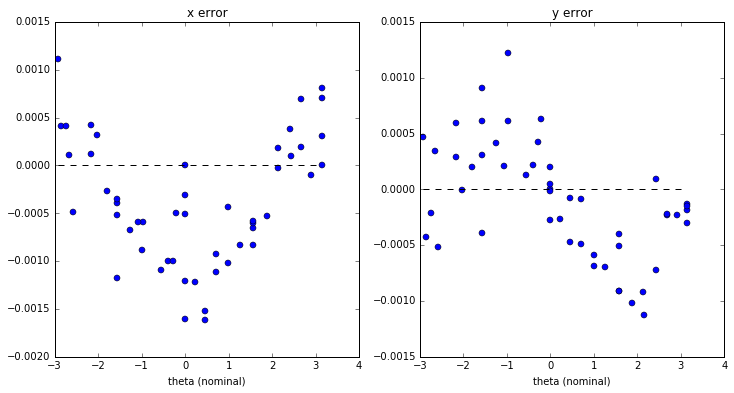

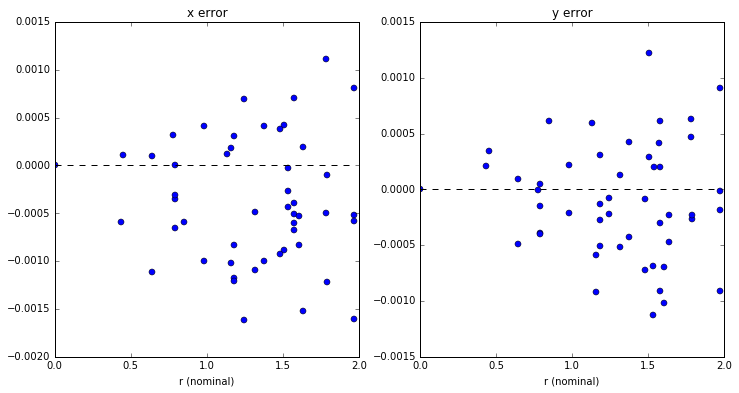

In [2]:
inDir = os.path.join('..', 'data')
inFile = os.path.join(inDir, 'NIST_randomized_metal_no1.csv')
Z = load_data(inFile)

# extract data of interest
# The measured variables wear hats.
x = Z[:,0];  xHat = Z[:,1]
y = Z[:,2];  yHat = Z[:,3]
d = Z[:,4];  dHat = Z[:,5]
z = Z[:,6];  zHat = Z[:,7]

r, theta = cart2polar(x,y)
rHat, thetaHat = cart2polar(xHat, yHat)

# Apply a rotation to the pin locations.
alpha = np.pi/1100.0 
rotClockwise = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
print('Rotating observed pin locations about z axis')

# Variables with tildes are the rotated versions of the hats (observations)
obsHat = np.vstack((xHat, yHat))
obsTilde = np.dot(rotClockwise, obsHat)
xTilde = obsTilde[0,:]
yTilde = obsTilde[1,:]

plot_xy_err_2d(theta, xTilde-x, yTilde-y, xLabel='theta (nominal)')
plot_xy_err_2d(r, xTilde-x, yTilde-y, xLabel='r (nominal)')